In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [3]:
def my_mul(M, N):
    rows = M.shape[0]
    cols = N.shape[1]
    A = np.zeros((rows, cols))

    if rows != cols:
        print("Not Compatible")
        return
    else:
        for i in range(0, rows):
            for j in range(0, cols):
                A[i][j] = sum(M[i, :] * N[:, j])
    
    return A
    

In [4]:
np_avg = []
my_avg = []
i = 2
while i < 513:
    M = np.random.rand(i, i)

    np_time = []
    my_time = []

    for j in range(30):
        st = time.time()
        A = np.matmul(M, M)
        et = time.time()
        np_time.append(et-st)
    np_avg.append(np.average(np_time))

    for j in range(30):
        st = time.time()
        A = my_mul(M, M)
        et = time.time()
        my_time.append(et-st)
    my_avg.append(np.average(my_time))

    i = i * 2

In [5]:
print("numpy:", np_avg)
print("my_algo:", my_avg)

numpy: [3.33706537882487e-05, 0.0, 0.0, 0.0, 3.33865483601888e-05, 3.4586588541666666e-05, 0.0003319263458251953, 0.0006017367045084636, 0.004199997584025065]
my_algo: [3.3354759216308595e-05, 0.00013318856557210286, 0.00020162264506022135, 0.0010649760564168294, 0.006041717529296875, 0.044582645098368325, 0.2359015146891276, 1.873703662554423, 15.34678807258606]


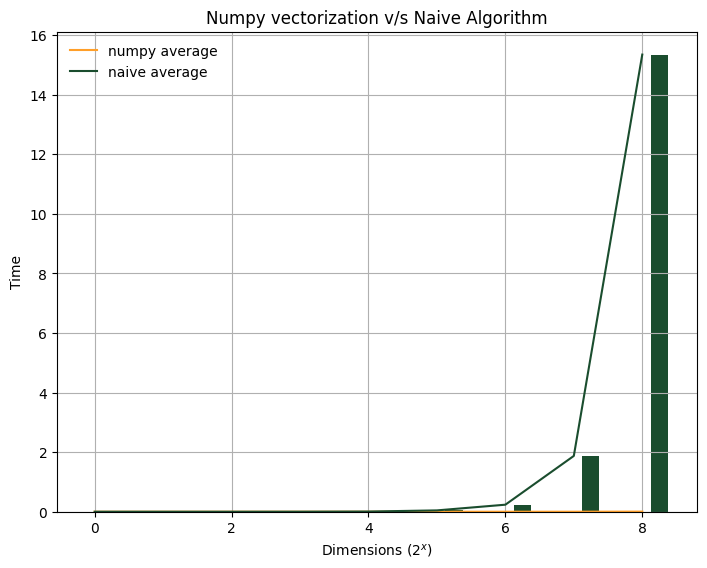

In [6]:
X = np.arange(len(np_avg))
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(X + 0.00, np_avg, color='#FF9F29', width=0.25)
ax.bar(X + 0.25, my_avg, color='#1A4D2E', width=0.25)
ax.plot(X, np_avg, color='#FF9F29', label="numpy average")
ax.plot(X, my_avg, color='#1A4D2E', label="naive average")
leg = ax.legend(loc="upper left", frameon=False)

plt.xlabel("Dimensions ($2^{x}$)")
plt.ylabel("Time")
plt.title("Numpy vectorization v/s Naive Algorithm")
plt.grid()

plt.show()